In [1]:
using PyPlot

In [2]:
using FileIO, ImageMagick, ImageIO, Colors, HDF5
using Distributions

In [3]:
    # Pixel Size used in MCMC analysis: 
    
values_mcmc = (    
    BTV50 = [0.0271,  0.0305],
    BTV53 = [0.0216, 0.0234],
    BTV26 = [0.114, 0.125],
    IS2 = [3*0.0303, 3*0.0298],
)

(BTV50 = [0.0271, 0.0305], BTV53 = [0.0216, 0.0234], BTV26 = [0.114, 0.125], IS2 = [0.09090000000000001, 0.08940000000000001])

In [4]:
    # Pixel size obtained from the calibration frame: 

values_calibration = (    
    BTV50 = [0.0262,  0.0296], #[0.0284, 0.0315],
    BTV53 = [0.0210, 0.0230], #[0.0225, 0.0245],
    BTV26 = [0.1132, 0.1263],
    IS2 = [0.0404, 0.0401],
)

(BTV50 = [0.0262, 0.0296], BTV53 = [0.021, 0.023], BTV26 = [0.1132, 0.1263], IS2 = [0.0404, 0.0401])

    # Pixel size obratined from the event file

    BTV50 = [0.0271, 0.0305], 
    BTV53 = [0.0216, 0.0234], 
    BTV26 = [0.1140, 0.1250],
    IS2 = 
    
    # Marlene's student:
    30 / 960 = 0.03125 
    
    # Marlene's thesis:
    0.116 mm / pixel

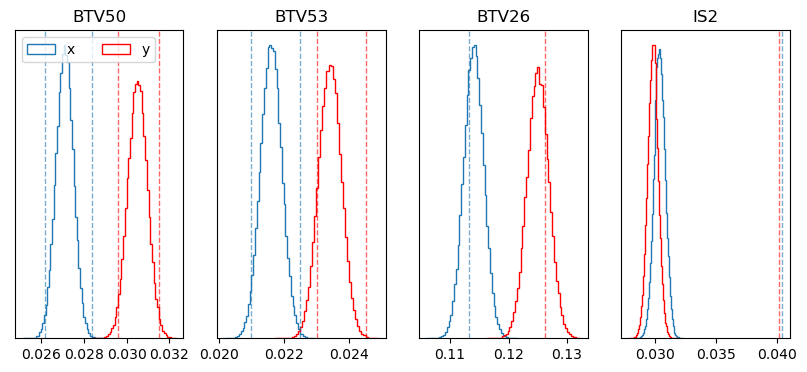

PyObject <matplotlib.legend.Legend object at 0x7f3b9804ac10>

In [5]:
β = 0.015

dist_1x = truncated(Normal(0.0271, β*0.0271), 0, Inf)
dist_2x = truncated(Normal(0.0216, β*0.0216), 0, Inf)
dist_3x = truncated(Normal(0.1140, β*0.1140), 0, Inf)
dist_4x = truncated(Normal(0.03033, β*0.03033), 0, Inf)

dist_1y = truncated(Normal(0.0305, β*0.0305), 0, Inf)
dist_2y = truncated(Normal(0.0234, β*0.0234), 0, Inf)
dist_3y = truncated(Normal(0.1250, β*0.1250), 0, Inf)
dist_4y = truncated(Normal(0.0298, β*0.0298), 0, Inf)

fig, ax = plt.subplots(1,4, figsize=(10,4))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
[ax[i].set_yticks([]) for i in 1:4]

ax[1].hist(rand(dist_1x, 10^5), histtype=:step, bins=50, density=true, color="C0", label="x")
ax[1].hist(rand(dist_1y, 10^5), histtype=:step, bins=50, density=true, color="red", label="y")

ax[1].axvline([0.0262,], linestyle="dashed", color="C0", lw=1.0, alpha=0.6, )
ax[1].axvline([0.0284,], linestyle="dashed", color="C0", lw=1.0, alpha=0.6, )

ax[1].axvline([0.0296,], linestyle="dashed", color="red", lw=1.0, alpha=0.6, )
ax[1].axvline([0.0315,], linestyle="dashed", color="red", lw=1.0, alpha=0.6, )

ax[2].hist(rand(dist_2x, 10^5), histtype=:step, bins=50, density=true, color="C0")
ax[2].hist(rand(dist_2y, 10^5), histtype=:step, bins=50, density=true, color="red")

ax[2].axvline([0.0210,], linestyle="dashed", color="C0", lw=1.0, alpha=0.6, )
ax[2].axvline([0.0225,], linestyle="dashed", color="C0", lw=1.0, alpha=0.6, )

ax[2].axvline([0.0230,], linestyle="dashed", color="red", lw=1.0, alpha=0.6, )
ax[2].axvline([0.0245,], linestyle="dashed", color="red", lw=1.0, alpha=0.6, )

ax[3].hist(rand(dist_3x, 10^5), histtype=:step, bins=50, density=true, color="C0")
ax[3].hist(rand(dist_3y, 10^5), histtype=:step, bins=50, density=true, color="red")

ax[3].axvline([0.1132,], linestyle="dashed", color="C0", lw=1.0, alpha=0.6, )
ax[3].axvline([0.1263,], linestyle="dashed", color="red", lw=1.0, alpha=0.6, )

ax[4].hist(rand(dist_4x, 10^5), histtype=:step, bins=50, density=true, color="C0")
ax[4].hist(rand(dist_4y, 10^5), histtype=:step, bins=50, density=true, color="red")

ax[4].axvline([0.0404,], linestyle="dashed", color="C0", lw=1.0, alpha=0.6, )
ax[4].axvline([0.0401,], linestyle="dashed", color="red", lw=1.0, alpha=0.6, )

ax[1].set_title("BTV50")
ax[2].set_title("BTV53")
ax[3].set_title("BTV26")
ax[4].set_title("IS2")

ax[1].legend(ncol=2)

In [6]:
# #   Resolution: 
    
# σ_x = [0.0874, 0.0861, 0.303, 3*0.202]
# σ_y = [0.0895, 0.0918,  0.201, 3*0.189];

# res_px_x = round.(σ_x ./ δ_x, sigdigits=3)
# res_px_y = round.(σ_y ./ δ_y, sigdigits=3)

# Camera #1 (BTV 50): 

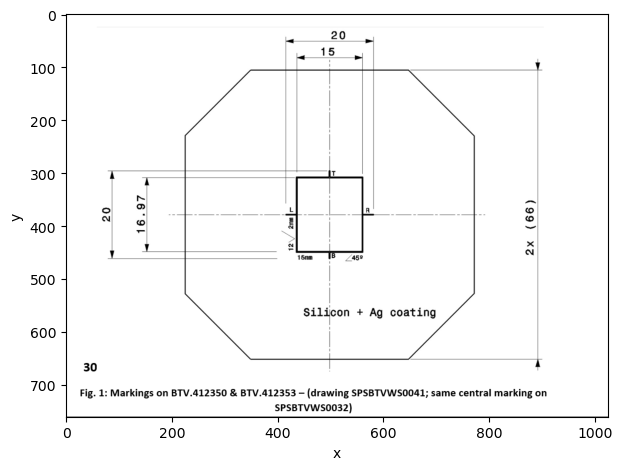

PyObject Text(24.000000000000007, 0.5, 'y')

In [7]:
img_path = "../data/resolution/Screen_BTV-50-53.png"
img = Gray.(load(img_path))
img_frame = convert(Array{Float64},img);

fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.imshow(img_frame, cmap="gray")

ax.set_xlabel("x")
ax.set_ylabel("y")

## x-projection:

dx = (15.0 / 2) / (stop.x - start.x) = 0.026223776223776224
dy = ((16.97 / 2) * cos(pi / 4)) / abs(stop.y - start.y) = 0.029555670139743133


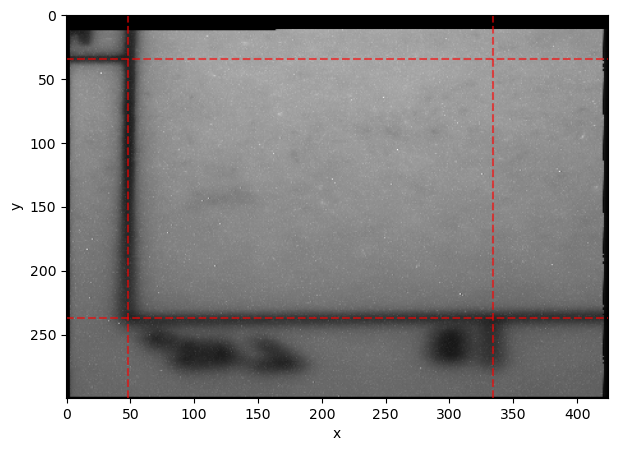

(stop.x - start.x, stop.y - start.y) = (286, -203)


In [8]:
img_path = "../data/resolution/2018_10_17/TT41.BTV412350_S1_F75_B.png"
img = Gray.(load(img_path))
img_x = convert(Array{Float64},img)

fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.imshow(img_x, cmap="gray")

start = (x = 48, y = 237)
stop = (x = 334, y = 34)

ax.axhline(start.y, linestyle="dashed", color="red", lw=1.5, alpha=0.6)
ax.axhline(stop.y, linestyle="dashed", color="red", lw=1.5, alpha=0.6)

ax.axvline(start.x, linestyle="dashed", color="red", lw=1.5, alpha=0.6)
ax.axvline(stop.x, linestyle="dashed", color="red", lw=1.5, alpha=0.6)

ax.set_xlabel("x")
ax.set_ylabel("y")

@show dx = 15.0/2/(stop.x - start.x) # mm/pixel
@show dy = (16.97/2)*cos(pi/4) / abs((stop.y - start.y))
@show stop.x - start.x, stop.y - start.y;

## y-projection: 

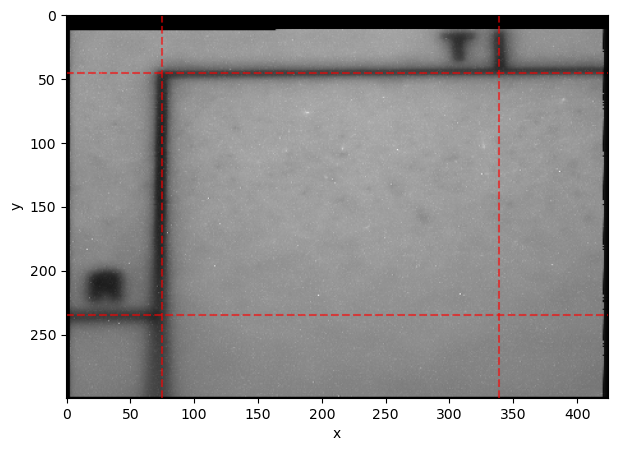

dx = (15.0 / 2) / (stop.x - start.x) = 0.028409090909090908
dy = ((16.97 / 2) * cos(pi / 4)) / abs(stop.y - start.y) = 0.031577900201936085


0.031577900201936085

In [9]:
img_path = "../data/resolution/2018_10_17/TT41.BTV412350_S1_F75_RT_Corner.png"
img = Gray.(load(img_path))
img_y = convert(Array{Float64},img)

fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.imshow(img_y, cmap="gray")

start = (x = 75, y = 235)
stop = (x = 339, y = 45)

ax.axhline(start.y, linestyle="dashed", color="red", lw=1.5, alpha=0.6)
ax.axhline(stop.y, linestyle="dashed", color="red", lw=1.5, alpha=0.6)

ax.axvline(start.x, linestyle="dashed", color="red", lw=1.5, alpha=0.6)
ax.axvline(stop.x, linestyle="dashed", color="red", lw=1.5, alpha=0.6)

ax.set_xlabel("x")
ax.set_ylabel("y")

@show dx = 15.0/2/(stop.x - start.x) # mm/pixel
@show dy = (16.97/2)*cos(pi/4) / abs((stop.y - start.y))

# Camera #2 (BTV 53): 

## x-projection:

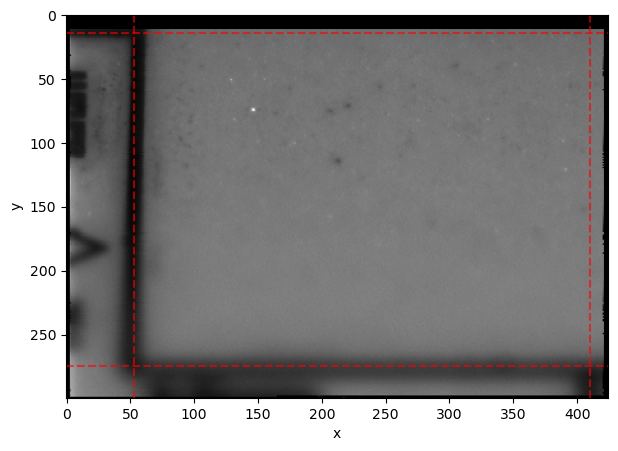

dx = (15.0 / 2) / (stop.x - start.x) = 0.02100840336134454
dy = ((16.97 / 2) * cos(pi / 4)) / abs(stop.y - start.y) = 0.022987743442022437
(stop.x - start.x, stop.y - start.y) = (357, -261)


In [10]:
img_path = "../data/resolution/2018_10_17/TT41.BTV412353_S1_F75_LB_Corner.png"
img = Gray.(load(img_path))
img_x = convert(Array{Float64},img);

fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.imshow(img_x, cmap="gray")

start = (x = 53, y = 275)
stop = (x = 410, y = 14)

ax.axhline(start.y, linestyle="dashed", color="red", lw=1.5, alpha=0.6)
ax.axhline(stop.y, linestyle="dashed", color="red", lw=1.5, alpha=0.6)

ax.axvline(start.x, linestyle="dashed", color="red", lw=1.5, alpha=0.6)
ax.axvline(stop.x, linestyle="dashed", color="red", lw=1.5, alpha=0.6)

ax.set_xlabel("x")
ax.set_ylabel("y")

@show dx = 15.0/2/(stop.x - start.x) # mm/pixel
@show dy = (16.97/2)*cos(pi/4) / abs((stop.y - start.y))
@show stop.x - start.x, stop.y - start.y;

## y-projection: 

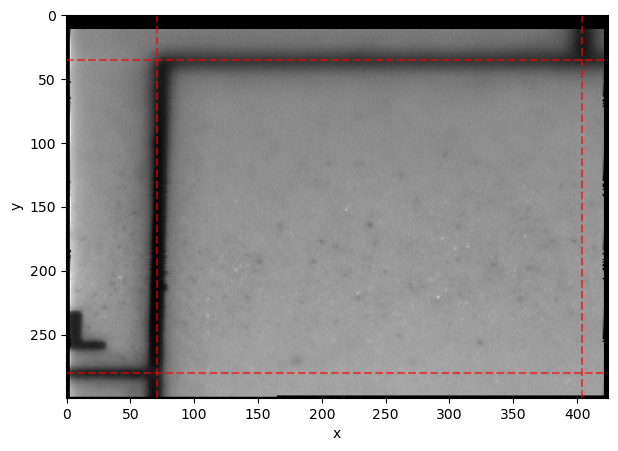

dx = (15.0 / 2) / (stop.x - start.x) = 0.02252252252252252
dy = ((16.97 / 2) * cos(pi / 4)) / abs(stop.y - start.y) = 0.02448898383007288


0.02448898383007288

In [11]:
img_path = "../data/resolution/2018_10_17/TT41.BTV412353_S1_F75_LT_Corner.png"
img = Gray.(load(img_path))
img_y = convert(Array{Float64},img);

fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.imshow(img_y, cmap="gray")

start = (x = 71, y = 280)
stop = (x = 404, y = 35)

ax.axhline(start.y, linestyle="dashed", color="red", lw=1.5, alpha=0.6)
ax.axhline(stop.y, linestyle="dashed", color="red", lw=1.5, alpha=0.6)

ax.axvline(start.x, linestyle="dashed", color="red", lw=1.5, alpha=0.6)
ax.axvline(stop.x, linestyle="dashed", color="red", lw=1.5, alpha=0.6)


ax.set_xlabel("x")
ax.set_ylabel("y")

@show dx = 15.0/2/(stop.x - start.x) # mm/pixel
@show dy = (16.97/2)*cos(pi/4) / abs((stop.y - start.y))

# Camera #3 (BTV 26): 

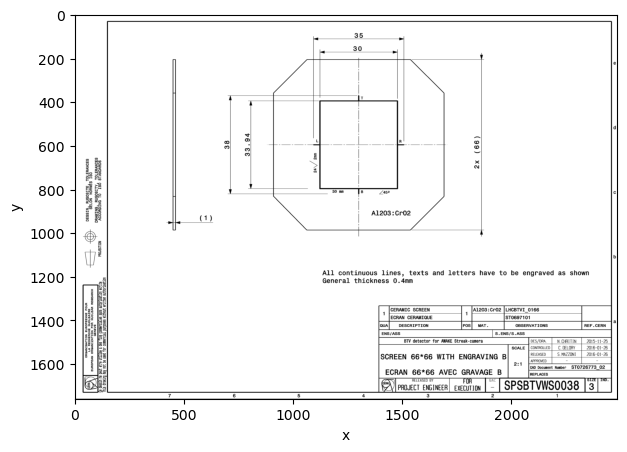

PyObject Text(24.0, 0.5, 'y')

In [12]:
img_path = "../data/resolution/Screen_BTV-26-is2.png"
img = Gray.(load(img_path))
img_frame = convert(Array{Float64},img);

fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.imshow(img_frame, cmap="gray")

ax.set_xlabel("x")
ax.set_ylabel("y")

## x-projection:

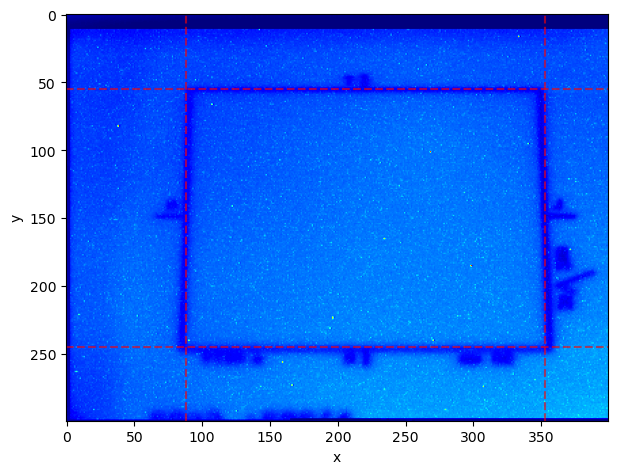

dx = 30.0 / (stop.x - start.x) = 0.11320754716981132
dy = (33.94 * cos(pi / 4)) / abs(stop.y - start.y) = 0.12631160080774434
(stop.x - start.x, stop.y - start.y) = (265, -190)


In [13]:
fid = h5open("../data/resolution/calib-data.h5", "r") do file
    read(file, "btv26")
    end;

img = convert.(Float64, fid)'

fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.imshow(img, cmap="jet")

start = (x = 88, y = 245)
stop = (x = 353, y = 55)

ax.axhline(start.y, linestyle="dashed", color="red", lw=1.5, alpha=0.6)
ax.axhline(stop.y, linestyle="dashed", color="red", lw=1.5, alpha=0.6)

ax.axvline(start.x, linestyle="dashed", color="red", lw=1.5, alpha=0.6)
ax.axvline(stop.x, linestyle="dashed", color="red", lw=1.5, alpha=0.6)

ax.set_xlabel("x")
ax.set_ylabel("y")


@show dx = 30.0/(stop.x - start.x) # mm/pixel
@show dy = (33.94)*cos(pi/4) / abs((stop.y - start.y))
@show stop.x - start.x, stop.y - start.y;

In [14]:
0.4/30.0

0.013333333333333334

In [15]:
0.1132, 0.1263

(0.1132, 0.1263)

# Camera #4 (IS2): 

    Scintillating Chromox (Al2O3:CrO2) screen

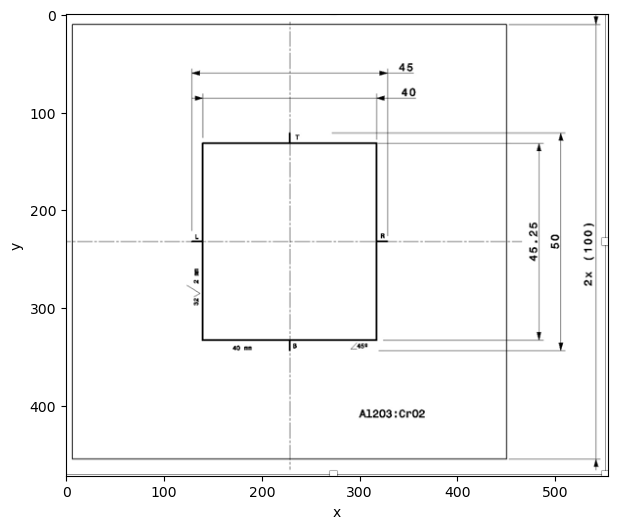

PyObject Text(24.000000000000007, 0.5, 'y')

In [16]:
img_path = "../data/resolution/IS2.png"
img = Gray.(load(img_path))
img_frame = convert(Array{Float64},img);

fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.imshow(img_frame, cmap="gray")

ax.set_xlabel("x")
ax.set_ylabel("y")

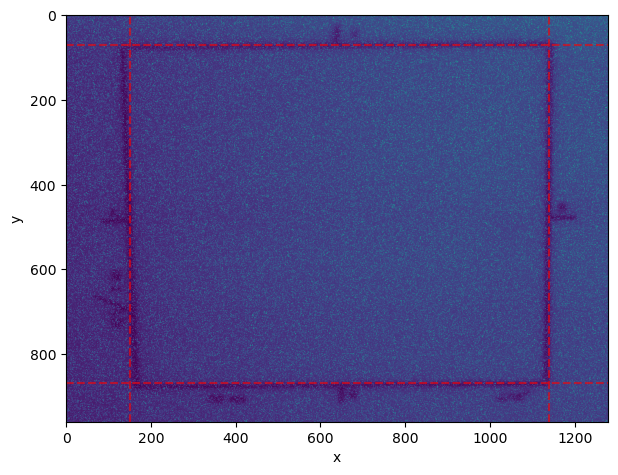

dx = 40.0 / (stop.x - start.x) = 0.04040404040404041
dy = (45.25 * cos(pi / 4)) / abs(stop.y - start.y) = 0.040146275845283914


0.040146275845283914

In [17]:
fid = h5open("../data/resolution/calib-data.h5", "r") do file
    read(file, "is2")
end

img = convert.(Float64, fid)';

fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.imshow(img, ) # cmap="gray"

start = (x = 150, y = 867)
stop = (x = 1140, y = 70)

ax.axhline(start.y, linestyle="dashed", color="red", lw=1.5, alpha=0.6)
ax.axhline(stop.y, linestyle="dashed", color="red", lw=1.5, alpha=0.6)

ax.axvline(start.x, linestyle="dashed", color="red", lw=1.5, alpha=0.6)
ax.axvline(stop.x, linestyle="dashed", color="red", lw=1.5, alpha=0.6)


ax.set_xlabel("x")
ax.set_ylabel("y")


@show dx = 40.0/(stop.x - start.x) # mm/pixel
@show dy = (45.25)*cos(pi/4)/ abs((stop.y - start.y))

In [18]:
@show dx = 30.0/(stop.x - start.x) # mm/pixel
@show dy = (33.94)*cos(pi/4)/ abs((stop.y - start.y))

dx = 30.0 / (stop.x - start.x) = 0.030303030303030304
dy = (33.94 * cos(pi / 4)) / abs(stop.y - start.y) = 0.03011192491025273


0.03011192491025273

In [19]:
 0.0404 / 0.03125

1.2928

In [20]:
1135-145

990

## Camera #4 (IS2): (updated images)

In [21]:
using MAT

In [22]:
file = matopen("../data/resolution/is_calibr/BOVWA_02TCC4_AWAKECAM02_2020_11_02_10_58_33.mat")
img_is_1 = read(file, "data_struct") 

# img_is_1 = matread("../data/resolution/is_calibr/BOVWA_02TCC4_AWAKECAM02_2020_11_02_10_57_59.mat")


Dict{String, Any} with 3 entries:
  "image" => [1389.0 1537.0 … 1621.0 1260.0; 1569.0 2631.0 … 1630.0 1580.0; … ;…
  "y_ax"  => [-2.544 -2.53869 … 2.53869 2.544]
  "x_ax"  => [-3.392 -3.3867 … 3.3867 3.392]

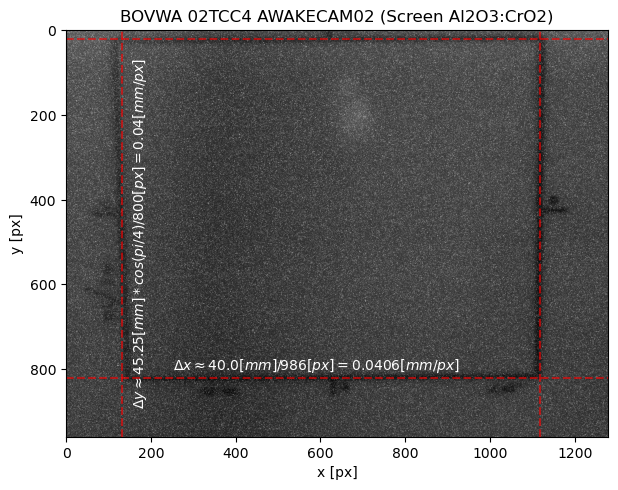

dx = 40.0 / (stop.x - start.x) = 0.04056795131845842
dy = (45.25 * cos(pi / 4)) / abs(stop.y - start.y) = 0.0399957273108641
(stop.x - start.x, stop.y - start.y) = (986, -800)


In [23]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

ax.imshow(img_is_1["image"], cmap="gray")

start = (x = 132, y = 820)
stop = (x = 1118, y = 20)

ax.axhline(start.y, linestyle="dashed", color="red", lw=1.5, alpha=0.6)
ax.axhline(stop.y, linestyle="dashed", color="red", lw=1.5, alpha=0.6)

ax.axvline(start.x, linestyle="dashed", color="red", lw=1.5, alpha=0.6)
ax.axvline(stop.x, linestyle="dashed", color="red", lw=1.5, alpha=0.6)

ax.set_title("BOVWA 02TCC4 AWAKECAM02 (Screen Al2O3:CrO2)")

plt.text(start.x + 120, start.y - 20, L"\Delta x \approx 40.0 [mm] / 986 [px] = 0.0406 [mm / px]", color="white")
plt.text(start.x + 20, start.y + 60, L"\Delta y \approx 45.25 [mm]*cos(pi/4) / 800 [px] = 0.04 [mm / px]", color="white", rotation="vertical")

ax.set_xlabel("x [px]")
ax.set_ylabel("y [px]")

@show dx = 40.0/(stop.x - start.x) # mm/pixel
@show dy = (45.25)*cos(pi/4)/ abs((stop.y - start.y))
@show stop.x - start.x, stop.y - start.y;

In [24]:
dx_is2 = diff([img_is_1["x_ax"]...])[1]
dy_is2 = diff([img_is_1["y_ax"]...])[1]
@show dx_is2, dy_is2

(dx_is2, dy_is2) = (0.005304143862392419, 0.0053055265901984505)


(0.005304143862392419, 0.0053055265901984505)

In [25]:
45.25*cos(pi/4)

31.996581848691278

# Summary: 

In [26]:
0.4/7.5/sqrt(12)*0.0271

0.0004172317945343696

In [27]:
7.5/0.0271

276.7527675276753

In [28]:
7.5/277

0.02707581227436823

In [29]:
# Camera 1: do not use std here 

cam_1 = (dx = 0.0271, dy = 0.0305, σx = 0.052, σy = 0.052)
cam_2 = (dx = 0.0216, dy = 0.0234, σx = 0.052, σy = 0.052)
cam_3 = (dx = 0.114, dy = 0.125, σx = 0.013, σy = 0.013) 
cam_4 = (dx = 0.0406, dy = 0.0400, σx = 0.005, σy = 0.005)

(dx = 0.0406, dy = 0.04, σx = 0.005, σy = 0.005)

In [30]:
# std used in Thesis 

cam_1_std = (x = (2*0.4/15/sqrt(12))*0.0271, y= (2*0.4/(16.97*cos(pi/4))/sqrt(12))*0.0305 )
cam_2_std = (x = (2*0.4/15/sqrt(12))*0.0216, y= (2*0.4/(16.97*cos(pi/4))/sqrt(12))*0.0234 )
cam_3_std = (x = (2*0.4/30/sqrt(12))*0.114, y= (2*0.4/(33.94*cos(pi/4))/sqrt(12))*0.125 )
cam_4_std = (x = (2*0.4/40/sqrt(12))*0.0406, y= (2*0.4/(45.25*cos(pi/4))/sqrt(12))*0.0400 )

(x = 0.00023440420929098806, y = 0.00028870597336670976)

# Event file analysis: 

In [42]:
fid = h5open("../data/resolution/event_file/1539822259335000000_149_3762.h5", "r")

x_ticks_50 = read(fid["/AwakeEventData/TT41.BTV.412350/Image/imagePositionSet1"])[:,1]
y_ticks_50 = read(fid["/AwakeEventData/TT41.BTV.412350/Image/imagePositionSet2"])[:,1]
img_50 = reshape(read(fid["/AwakeEventData/TT41.BTV.412350/Image/imageSet"])[:,1], length(x_ticks_50), length(y_ticks_50))

x_ticks_53 = read(fid["/AwakeEventData/TT41.BTV.412353/Image/imagePositionSet1"])[:,1]
y_ticks_53 = read(fid["/AwakeEventData/TT41.BTV.412353/Image/imagePositionSet2"])[:,1]
img_53 = reshape(read(fid["/AwakeEventData/TT41.BTV.412353/Image/imageSet"])[:,1], length(x_ticks_53), length(y_ticks_53))

x_ticks_26 = read(fid["/AwakeEventData/TT41.BTV.412426/Image/imagePositionSet1"])[:,1]
y_ticks_26 = read(fid["/AwakeEventData/TT41.BTV.412426/Image/imagePositionSet2"])[:,1]
img_26 = reshape(read(fid["/AwakeEventData/TT41.BTV.412426/Image/imageSet"])[:,1], length(x_ticks_26), length(y_ticks_26));

img_is2 = read(fid["/AwakeEventData/BOVWA.02TCC4.AWAKECAM02/ExtractionImage/imageRawData"])
maybe_pixel_x = read(fid["/AwakeEventData/BOVWA.02TCC4.AWAKECAM02/ExtractionImage/cogX"])[1]
maybe_pixel_y = read(fid["/AwakeEventData/BOVWA.02TCC4.AWAKECAM02/ExtractionImage/cogY"])[1]

-0.10102073669433594

In [43]:
size(img_is2)

(1280, 960)

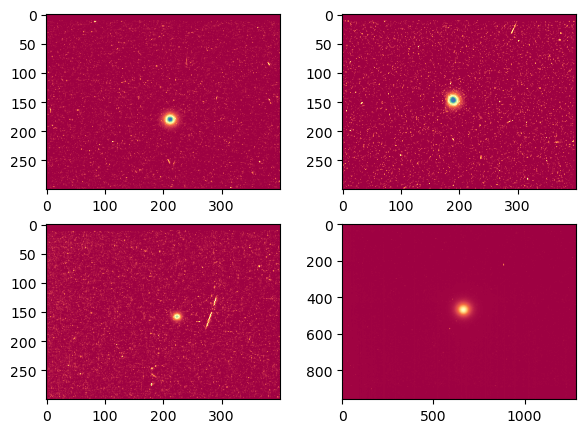

PyObject <matplotlib.image.AxesImage object at 0x7f3b80adfb80>

In [44]:
fig, ax = plt.subplots(2,2, figsize=(7,5))

ax[1,1].imshow(img_50', cmap="Spectral")
ax[1,2].imshow(img_53', cmap="Spectral")
ax[2,1].imshow(img_26', cmap="Spectral")
ax[2,2].imshow(img_is2', cmap="Spectral")

In [45]:
# Additional Information:

tmp = read(fid["/AwakeEventData/TT41.BTV.412350/Image/acqTime"])

1-element Vector{String}:
 "2018/10/18 00:24:24.828169"

In [48]:
tmp = read(fid["/AwakeEventData/TT41.BCTF.412340/Acquisition/totalIntensityPreferred"])

1-element Vector{Float32}:
 23.8271

In [35]:
# Screen Type: 

screens_1, sel_screen_1 = read(fid["/AwakeEventData/TT41.BTV.412350/Acquisition/screenSelectStr"]), read(fid["/AwakeEventData/TT41.BTV.412350/Acquisition/screenSelect"])
@show screens_1, sel_screen_1

screens_2, sel_screen_2 = read(fid["/AwakeEventData/TT41.BTV.412353/Acquisition/screenSelectStr"]), read(fid["/AwakeEventData/TT41.BTV.412353/Acquisition/screenSelect"])
@show screens_2, sel_screen_2

screens_3, sel_screen_3 = read(fid["/AwakeEventData/TT41.BTV.412426/Acquisition/screenSelectStr"]), read(fid["/AwakeEventData/TT41.BTV.412426/Acquisition/screenSelect"])
@show screens_1, sel_screen_1

screens_4, sel_screen_4 = read(fid["/AwakeEventData/TT41.BTV.412442/Acquisition/screenSelectStr"]), read(fid["/AwakeEventData/TT41.BTV.412442/Acquisition/screenSelect"])
@show screens_4, sel_screen_4; 

# "Silicon coated by silver" - screen SPSBTVWS0041
# "Chromox" - screen SPSBTVWS0041

(screens_1, sel_screen_1) = (["Out", "Al2O3:CrO2", "Out", "SiAg"], Int32[3])
(screens_2, sel_screen_2) = (["Out", "Al2O3:CrO2", "Out", "SiAg"], Int32[3])
(screens_1, sel_screen_1) = (["Out", "Al2O3:CrO2", "Out", "SiAg"], Int32[3])
(screens_4, sel_screen_4) = (["Out", "Al2O3:CrO2_H", "Al2O3:CrO2", "Al2O3:CrO2_AL"], Int32[2])


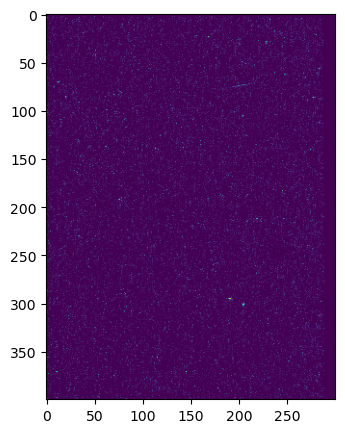

PyObject <matplotlib.image.AxesImage object at 0x7f3b80fc49a0>

In [36]:
# BTV42 -- IS2 are the same 

x_ticks_42 = read(fid["/AwakeEventData/TT41.BTV.412442/Image/imagePositionSet1"])[:,1]
y_ticks_42 = read(fid["/AwakeEventData/TT41.BTV.412442/Image/imagePositionSet2"])[:,1]
img_42 = reshape(read(fid["/AwakeEventData/TT41.BTV.412442/Image/imageSet"])[:,1], length(x_ticks_42), length(y_ticks_42));

fig, ax = plt.subplots(1,1, figsize=(7,5))

ax.imshow(img_42)

In [37]:
# tmp = fid["/AwakeEventData/TT41.BTV.412442/Image/"]
# tmp = read(tmp)

In [38]:
file = matopen("../data/resolution/is_calibr/BOVWA_02TCC4_AWAKECAM02_2020_11_02_10_58_33.mat")
img_4 = read(file, "data_struct")["image"]

fid = h5open("../data/resolution/calib-data.h5", "r") do file
    read(file, "btv26")
end;
img_3 = convert.(Float64, fid)';

img_path = "../data/resolution/2018_10_17/TT41.BTV412353_S1_F75_LT_Corner.png"
img = Gray.(load(img_path))
img_2 = convert(Array{Float64},img);

img_path = "../data/resolution/2018_10_17/TT41.BTV412350_S1_F75_RT_Corner.png"
img = Gray.(load(img_path))
img_1 = convert(Array{Float64},img);

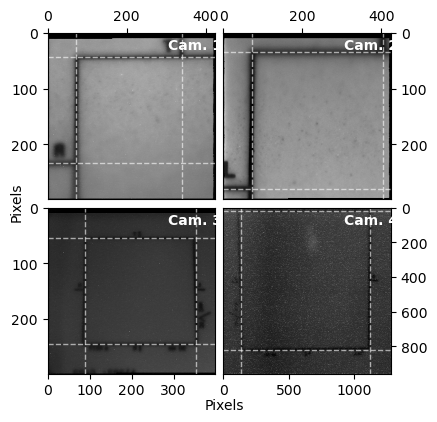

In [40]:
# make a general plot: 

fig, ax = plt.subplots(2,2, figsize=(4.429223744292238, 4.429223744292238))
fig.subplots_adjust(hspace=0.05, wspace=0.05) #hspace=0.1, 

ax[1,1].pcolormesh(img_1, cmap="gray", shading="gouraud")
ax[1,2].pcolormesh(img_2, cmap="gray", shading="gouraud")
ax[2,1].pcolormesh(img_3, cmap="gray", shading="gouraud")
ax[2,2].pcolormesh(img_4, cmap="gray", shading="gouraud")

ax[1,1].invert_yaxis()
ax[1,2].invert_yaxis()
ax[2,1].invert_yaxis()
ax[2,2].invert_yaxis()

start = (x = 72, y = 234)
stop = (x = 339, y = 43)
ax[1,1].axhline(start.y, linestyle="dashed", color="white", lw=1.0, alpha=0.6)
ax[1,1].axhline(stop.y, linestyle="dashed", color="white", lw=1.0, alpha=0.6)
ax[1,1].axvline(start.x, linestyle="dashed", color="white", lw=1.0, alpha=0.6)
ax[1,1].axvline(stop.x, linestyle="dashed", color="white", lw=1.0, alpha=0.6)

start = (x = 71, y = 280)
stop = (x = 404, y = 35)
ax[1,2].axhline(start.y, linestyle="dashed", color="white", lw=1.0, alpha=0.6)
ax[1,2].axhline(stop.y, linestyle="dashed", color="white", lw=1.0, alpha=0.6)
ax[1,2].axvline(start.x, linestyle="dashed", color="white", lw=1.0, alpha=0.6)
ax[1,2].axvline(stop.x, linestyle="dashed", color="white", lw=1.0, alpha=0.6)

start = (x = 88, y = 245)
stop = (x = 353, y = 55)
ax[2,1].axhline(start.y, linestyle="dashed", color="white", lw=1.0, alpha=0.6)
ax[2,1].axhline(stop.y, linestyle="dashed", color="white", lw=1.0, alpha=0.6)
ax[2,1].axvline(start.x, linestyle="dashed", color="white", lw=1.0, alpha=0.6)
ax[2,1].axvline(stop.x, linestyle="dashed", color="white", lw=1.0, alpha=0.6)

start = (x = 132, y = 820)
stop = (x = 1118, y = 20)
ax[2,2].axhline(start.y, linestyle="dashed", color="white", lw=1.0, alpha=0.6)
ax[2,2].axhline(stop.y, linestyle="dashed", color="white", lw=1.0, alpha=0.6)
ax[2,2].axvline(start.x, linestyle="dashed", color="white", lw=1.0, alpha=0.6)
ax[2,2].axvline(stop.x, linestyle="dashed", color="white", lw=1.0, alpha=0.6)

fig.text(0.04, 0.5, "Pixels", va="center", rotation="vertical")
fig.text(0.48, 0.04, "Pixels", va="center", rotation="horizontal")

ax[1,1].text(0.72,0.9,"Cam. 1", transform=ax[1,1].transAxes, color="white", fontweight="bold")
ax[1,2].text(0.72,0.9,"Cam. 2", transform=ax[1,2].transAxes, color="white", fontweight="bold")
ax[2,1].text(0.72,0.9,"Cam. 3", transform=ax[2,1].transAxes, color="white", fontweight="bold")
ax[2,2].text(0.72,0.9,"Cam. 4", transform=ax[2,2].transAxes, color="white", fontweight="bold")

ax[1,2].yaxis.set_label_position("right")
ax[1,2].yaxis.tick_right()

ax[2,2].yaxis.set_label_position("right")
ax[2,2].yaxis.tick_right()

ax[1,2].xaxis.set_label_position("top")
ax[1,2].xaxis.tick_top()

ax[1,1].xaxis.set_label_position("top")
ax[1,1].xaxis.tick_top()

# fig.savefig("../plots/pix-calib.png", bbox_inches = "tight", dpi=350)